In [40]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# OLS Linear Regression

Coefficients: 
 [735.24704126]
Mean squared error: 4787.86
Coefficient of determination: 0.12


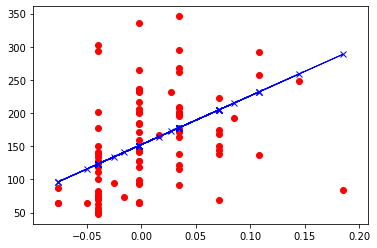

In [39]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
X = X[:, np.newaxis, 7]

# Split the data into training/testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, y_pred,  '-x', color='blue', linewidth=1)

plt.show()

In [59]:
# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True)

# Split the data into training/testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

print('r2 =', r2_score(y_test, y_pred))
print('MSE =',mean_squared_error(y_test, y_pred))

r2 = 0.4610882915687333
MSE = 2939.4160466455023


# K-NN Regression

## Linear Regression

Choose a number for k: 13
R^2 score: 0.96


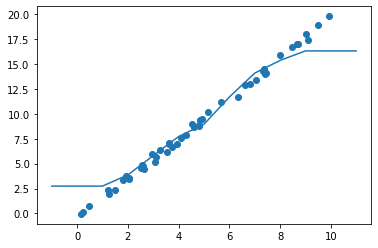

In [46]:
# generate the data
import matplotlib.pyplot as plt
import random

n  = int(input('Choose a number for k: '))

# generate some mostly linear data with stochastic noise added
x = pd.DataFrame([10 * random.random() for __ in range(50)])
y = 2 * x - 1 + pd.DataFrame([random.random() for __ in range(50)])

# pick model
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=n)
model.fit(x, y)

# compute the R^2 score
print("R^2 score: {0:.2f}".format(model.score(x,y)))

# plot the model together with the data
xfit = pd.DataFrame([i for i in range(-1, 12)])
yfit = model.predict(xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

## Non-linear Regression

Choose a number for k: 1
R^2 score: 1.00


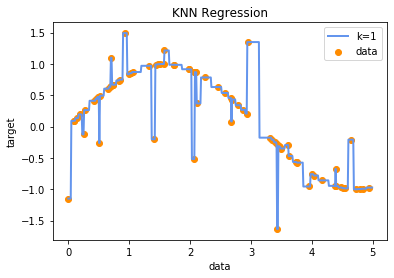

In [48]:
n  = int(input('Choose a number for k: '))

# Import the necessary modules and libraries
from sklearn.neighbors import KNeighborsRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = KNeighborsRegressor(n_neighbors=n)
regr_1.fit(X, y)
print("R^2 score: {0:.2f}".format(regr_1.score(X,y)))

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="k="+str(n), linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("KNN Regression")
plt.legend()
plt.show()

# MLP Regression

## Linear Regression

Choose a number for hidden nodes: 4


/Users/sclayton/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R^2 score: 1.00


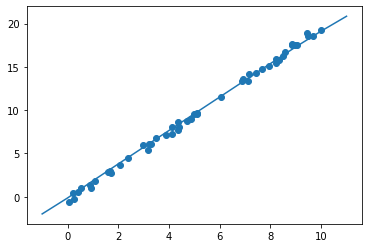

In [49]:
# generate the data
import matplotlib.pyplot as plt
import random

n  = int(input('Choose a number for hidden nodes: '))

X = pd.DataFrame([10 * random.random() for __ in range(50)])
y = 2 * X - 1 + pd.DataFrame([random.random() for __ in range(50)])

# pick model
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(n,),
                     activation='relu', max_iter=10000)
model.fit(X, y)

# compute the R^2 score
print("R^2 score: {0:.2f}".format(model.score(X,y)))

# plot the model together with the data
Xfit = pd.DataFrame([i for i in range(-1, 12)])
yfit = model.predict(Xfit)
plt.scatter(X, y)
plt.plot(Xfit, yfit)
plt.show()


## Non-linear Regression

Choose a number for hidden nodes: 12
R^2 score: 0.757847463672327


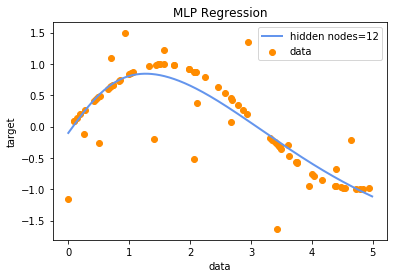

In [57]:

n  = int(input('Choose a number for hidden nodes: '))

# Import the necessary modules and libraries
import numpy as np
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = MLPRegressor(hidden_layer_sizes=(n,n), activation='tanh', max_iter=10000)
regr_1.fit(X, y)
print("R^2 score: {}".format(regr_1.score(X,y)))

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="hidden nodes="+str(n), linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("MLP Regression")
plt.legend()
plt.show()